# 차분(Differencing) 과 이동평균(MA) - Simple Trade Strategy

In [1]:
#!pip install update finance-datareader
#!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr

## Price difference (익일 종가 - 당일 종가)

PriceDiff = (Close Price of tomorrow - Close Price of today)

- shift(period)

In [3]:
fb = fdr.DataReader("META", start="20170809")    #Facebook
ms = fdr.DataReader("MSFT", start="20170809")  #Microsoft
ms

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-09,72.250000,72.510002,72.050003,72.470001,67.545181,22213400
2017-08-10,71.900002,72.190002,71.349998,71.410004,66.557220,24734500
2017-08-11,71.610001,72.699997,71.279999,72.500000,67.573143,21443700
2017-08-14,73.059998,73.720001,72.949997,73.589996,68.589066,20096600
2017-08-15,73.589996,73.589996,73.040001,73.220001,68.607803,19181400
...,...,...,...,...,...,...
2022-12-21,241.690002,245.619995,240.110001,244.429993,244.429993,23690600
2022-12-22,241.259995,241.990005,233.869995,238.190002,238.190002,28651700
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.729996,21203200


In [4]:
fb.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], 
        axis=1, inplace=True)
ms.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], 
        axis=1, inplace=True)

In [5]:
fb['Yesterday Close'] = fb['Close'].shift(1)
fb.head()

,Close,Yesterday Close
Date,,
2017-08-09,171.179993,NaN
2017-08-10,167.399994,171.179993
2017-08-11,168.080002,167.399994
2017-08-14,170.750000,168.080002
2017-08-15,171.000000,170.750000


Price Difference - manual 계산

In [6]:
fb['Price Difference'] = fb['Close'] - fb['Yesterday Close']
fb.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-08-09,171.179993,NaN,NaN
2017-08-10,167.399994,171.179993,-3.779999
2017-08-11,168.080002,167.399994,0.680008
2017-08-14,170.750000,168.080002,2.669998
2017-08-15,171.000000,170.750000,0.250000


Price Difference - diff() method 사용

In [7]:
fb['Price Diff2'] = fb['Close'].diff()
fb.head()

,Close,Yesterday Close,Price Difference,Price Diff2
Date,,,,
2017-08-09,171.179993,NaN,NaN,NaN
2017-08-10,167.399994,171.179993,-3.779999,-3.779999
2017-08-11,168.080002,167.399994,0.680008,0.680008
2017-08-14,170.750000,168.080002,2.669998,2.669998
2017-08-15,171.000000,170.750000,0.250000,0.250000


In [8]:
ms['Yesterday Close'] = ms['Close'].shift(1)
ms['Price Difference'] = ms['Close'].diff()
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-08-09,72.470001,NaN,NaN
2017-08-10,71.410004,72.470001,-1.059997
2017-08-11,72.500000,71.410004,1.089996
2017-08-14,73.589996,72.500000,1.089996
2017-08-15,73.220001,73.589996,-0.369995


In [9]:
print(ms['Price Difference'].loc['2017-11-03'])

0.0899959999999993


In [10]:
ms.head()

,Close,Yesterday Close,Price Difference
Date,,,
2017-08-09,72.470001,NaN,NaN
2017-08-10,71.410004,72.470001,-1.059997
2017-08-11,72.500000,71.410004,1.089996
2017-08-14,73.589996,72.500000,1.089996
2017-08-15,73.220001,73.589996,-0.369995


차분한 값으로부터 원래의 값 복원하기

In [11]:
ms['Price Difference'].cumsum() + ms['Close'][0]

Date
2017-08-09           NaN
2017-08-10     71.410004
2017-08-11     72.500000
2017-08-14     73.589996
2017-08-15     73.220001
                 ...    
2022-12-21    244.429993
2022-12-22    238.190002
2022-12-23    238.729996
2022-12-27    236.960007
2022-12-28    234.529999
Name: Price Difference, Length: 1357, dtype: float64

## 일일 수익률 계산

- 1 주를 계속 보유하였다고 가정.  


- 계산 방법. 

- Daily Return = df/df.shift(1) - 1  
    or
- Daily Return[1:] = df[1:] / df[:-1].values - 1  
    or    
- Daily Return = df.pct_chage()

In [12]:
ms['Return'] = ms['Close'] / ms['Yesterday Close'] - 1
ms.head()

,Close,Yesterday Close,Price Difference,Return
Date,,,,
2017-08-09,72.470001,NaN,NaN,NaN
2017-08-10,71.410004,72.470001,-1.059997,-0.014627
2017-08-11,72.500000,71.410004,1.089996,0.015264
2017-08-14,73.589996,72.500000,1.089996,0.015034
2017-08-15,73.220001,73.589996,-0.369995,-0.005028


In [17]:
ms['Close'][1:][:3]

Date
2017-08-10    71.410004
2017-08-11    72.500000
2017-08-14    73.589996
Name: Close, dtype: float64

In [18]:
ms['Close'][1:] / ms['Close'][:-1].values - 1

Date
2017-08-10   -0.014627
2017-08-11    0.015264
2017-08-14    0.015034
2017-08-15   -0.005028
2017-08-16    0.005873
                ...   
2022-12-21    0.010877
2022-12-22   -0.025529
2022-12-23    0.002267
2022-12-27   -0.007414
2022-12-28   -0.010255
Name: Close, Length: 1356, dtype: float64

In [19]:
ms['Close'].pct_change()

Date
2017-08-09         NaN
2017-08-10   -0.014627
2017-08-11    0.015264
2017-08-14    0.015034
2017-08-15   -0.005028
                ...   
2022-12-21    0.010877
2022-12-22   -0.025529
2022-12-23    0.002267
2022-12-27   -0.007414
2022-12-28   -0.010255
Name: Close, Length: 1357, dtype: float64

In [22]:
print(f"{len(pd.date_range(ms.index[0], ms.index[-1]))} 일간 1 주를 계속 보유하였다면 누적 수익율은")
print((1+ms['Return']).cumprod())

1968 일간 1 주를 계속 보유하였다면 누적 수익율은
Date
2017-08-09         NaN
2017-08-10    0.985373
2017-08-11    1.000414
2017-08-14    1.015455
2017-08-15    1.010349
                ...   
2022-12-21    3.372844
2022-12-22    3.286739
2022-12-23    3.294191
2022-12-27    3.269767
2022-12-28    3.236236
Name: Return, Length: 1357, dtype: float64


## 이동평균 - Moving average

- DataFrame.rolling()

In [23]:
# 3일 이동평균
(fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3

Date
2017-08-09           NaN
2017-08-10           NaN
2017-08-11    168.886663
2017-08-14    168.743332
2017-08-15    169.943334
                 ...    
2022-12-21    117.110000
2022-12-22    117.990000
2022-12-23    118.306669
2022-12-27    117.346667
2022-12-28    116.846667
Name: Close, Length: 1357, dtype: float64

In [24]:
fb['Close'].rolling(3).mean()

Date
2017-08-09           NaN
2017-08-10           NaN
2017-08-11    168.886663
2017-08-14    168.743332
2017-08-15    169.943334
                 ...    
2022-12-21    117.110000
2022-12-22    117.990000
2022-12-23    118.306669
2022-12-27    117.346667
2022-12-28    116.846667
Name: Close, Length: 1357, dtype: float64

### 이동평균 계산 및 이동평균선 시각화

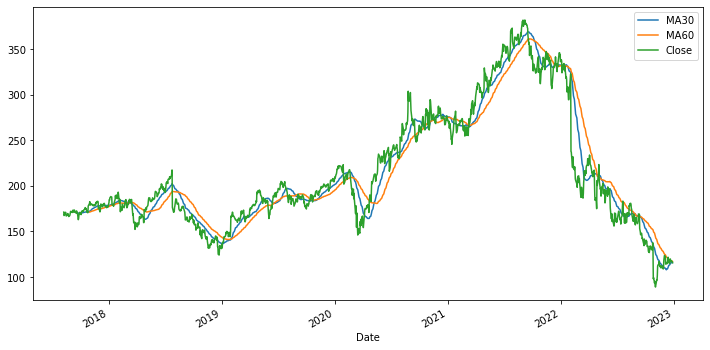

In [25]:
fb['ma30'] = fb['Close'].rolling(30).mean()
fb['ma60'] = fb['Close'].rolling(60).mean()#plot the moving average

#plot the moving average
plt.figure(figsize=(12, 6))
fb['ma30'].plot(label='MA30')
fb['ma60'].plot(label='MA60')
fb['Close'].plot(label='Close')
plt.legend()

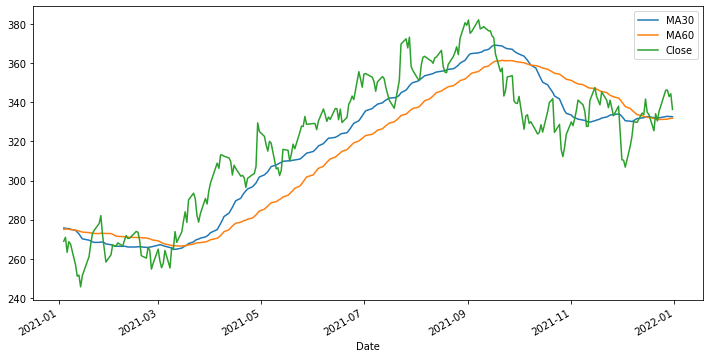

In [26]:
#특정 기간을 slicing한 이동평균 plot
plt.figure(figsize=(12, 6))
fb['ma30'].loc['2021-01-01':'2021-12-31'].plot(label='MA30')
fb['ma60'].loc['2021-01-01':'2021-12-31'].plot(label='MA60')
fb['Close'].loc['2021-01-01':'2021-12-31'].plot(label='Close')
plt.legend()
plt.show()

## EWMA (Exponentially-weighted moving average)


SMA(Simple Moving Average)에는 몇 가지 "약점"이 있습니다.
* window 가 작을수록 신호가 아닌 잡음이 증가합니다.
* 항상 window 크기만큼 지연됩니다.
* 평균화로 인해 데이터의 전체 피크 또는 계곡에 도달하지 않습니다.
* 미래의 움직임에 대해 실제로 알려주지 않습니다. 실제로는 데이터의 trend를 묘사하는 것입니다.
* 극단적인 historical value 로 인해 SMA가 크게 왜곡 될 수 있습니다.

이러한 문제를 해결하기 위해 EWMA (지수 가중 이동 평균)를 사용할 수 있습니다.

In [27]:
df = yf.download('AAPL', start='2020-01-01', end='2020-06-30', progress=False)
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.head()

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504


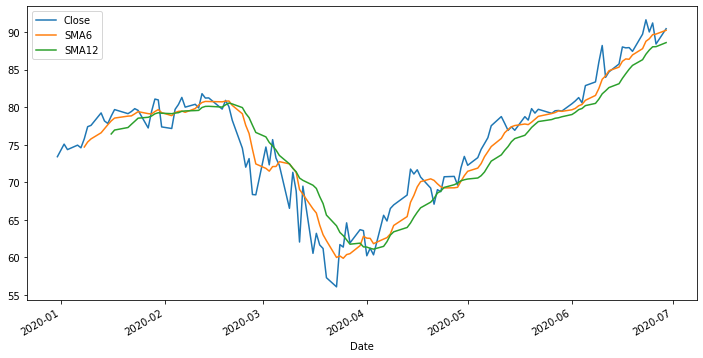

In [28]:
#SMA : Simple Moving Average

df['SMA6'] = df['Close'].rolling(window=6).mean()
df['SMA12'] = df['Close'].rolling(window=12).mean()
df.plot(figsize=(12, 6));

- EWMA를 사용하면 SMA의 지연 효과를 줄일 수 있으며 최근에 발생한 값에 더 많은 가중치를 적용합니다.  

- 가장 최근 값에 적용되는 가중치는 EWMA에 사용된 실제 매개 변수와 window 크기로 지정된 기간에 따라 다릅니다.

EWMA 공식은 다음과 같습니다.

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

$x_t$ 는 입력값, $w_i$ 는 적용된 weight (i=0 에서 t 사이로 변할 수 있음). $y_t$ 는 산출된 값입니다.

In [29]:
df['EWMA12'] = df['Close'].ewm(span=12).mean()
df.tail()

,Close,SMA6,SMA12,EWMA12
Date,,,,
2020-06-23,91.632500,88.771666,87.052082,87.036708
2020-06-24,90.014999,89.104167,87.606249,87.494907
2020-06-25,91.209999,89.656250,88.040624,88.066459
2020-06-26,88.407501,89.735416,88.057082,88.118927
2020-06-29,90.445000,90.237916,88.596249,88.476785


<AxesSubplot:xlabel='Date'>

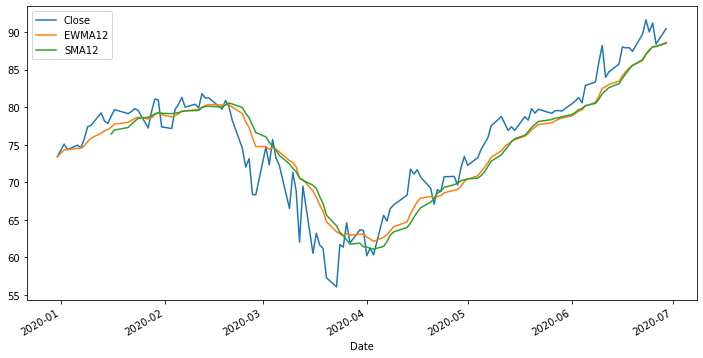

In [30]:
df[['Close', 'EWMA12', 'SMA12']].plot(figsize=(12, 6))